In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [15]:
def reg_graph_subplot(x, y, data, sct_size=None, s=10, title='', legend_visibility=True, legend_title='', xlabel='', ylabel='', fit_intercept=True, ativar_grafico_yx=False, reg_from_start=False, offset_txt_x=0.15, offset_txt_y=2.25, num_rows=1, num_cols=1, subplot_num=1, axes=None):
    # x = eixo x do gráfico
    # y = eixo y do gráfico
    # data = dataframe origem dos dados que representam x e y
    # sct_size = tamanho do scatter no gráfico BASEADO em uma coluna do dataframe
    # s = tamanho do scatter no gráfico BASEADO em um NUMERO
    # title = título do gráfico
    # legend_visibility = visibilidade da legenda
    # legend_title = título da legenda
    # xlabel = título do eixo x
    # ylabel = titulo do eixo y
    # offset_txt_x = deslocamento do texto da função no eixo x
    # offset_txt_y = deslocamento do texto da função no eixo y
    # num_rows = número de linhas de subplots
    # num_cols = número de colunas de subplots
    # subplot_num = número do subplot atual
    # axes = array de eixos para os subplots

    sns.set_style('darkgrid')

    if axes is None:
        f, ax = plt.subplots(num_rows, num_cols, figsize=(12, 5))
        ax = ax.flatten()
        ax = ax[subplot_num - 1]
    else:
        ax = axes[subplot_num - 1]

    sns.scatterplot(x=data[x], y=data[y], data=data, size=sct_size, s=s, ax=ax)

    rng = np.random.default_rng(1234)  # seed para valores aleatórios
    lr = LinearRegression(fit_intercept=fit_intercept)
    fitted_reg = lr.fit(data[[x]], data[[y]])

    if not fit_intercept:
        fitted_reg.intercept_ = [fitted_reg.intercept_]  # Prevenindo erros

    r2_score = fitted_reg.score(data[[x]], data[[y]])  # R² Score
    x_reg_line = rng.uniform(data[x].min(), data[x].max(), size=100)  # gerando valores entre os valores do scatterplot para criar a reta
    y_reg_line = x_reg_line * fitted_reg.coef_ + fitted_reg.intercept_[0]  # função y=ax + b para representar a reta criada

    if reg_from_start:

        if (data[x].min() < 0) and (abs(data[x].min()) > data[y].max()):  # Para valores data[x] negativos

            x_reg_line = rng.uniform(data[x].min() * 2, 0.0, size=10000)  # gerando valores entre os valores do scatterplot para criar a reta, partindo do 0

        elif (data[y].min() < 0) and (abs(data[y].min()) > data[x].max()):  # Para valores data[y] negativos

            x_reg_line = rng.uniform(data[y].min() * 2, 0.0, size=10000)  # gerando valores entre os valores do scatterplot para criar a reta, partindo do 0

        elif (data[x].max() > data[y].max()):

            x_reg_line = rng.uniform(0.0, data[x].max() * 2, size=10000)

        else:

            x_reg_line = rng.uniform(0.0, data[y].max() * 2, size=10000)

        y_reg_line = x_reg_line * fitted_reg.coef_ + fitted_reg.intercept_[0]  # função y=ax + b para representar a reta criada

    text_coord_x = data[x].max() - data[x].max() * offset_txt_x  # eixo x do texto

    ax.text(text_coord_x, offset_txt_y, f'Y={round(fitted_reg.coef_[0][0], 4)}x + {round(fitted_reg.intercept_[0], 4)}',
            fontsize=12, ha='center', va='center', color='blue')  # Texto da reta Azul
    ax.text(text_coord_x, offset_txt_y - (offset_txt_y * 0.3), f'R²:{round(r2_score, 4)}', fontsize=12, ha='center',
            va='center', color='blue')  # Texto r²

    ax.set_ylim((0, (data[y].max() + (data[y].max() / 2))))  # tamanho limite do plot no eixo y
    ax.set_xlim((0, data[x].max() + data[x].max() / 2))  # tamanho limite do plot no eixo x
    ax.plot(x_reg_line, y_reg_line[0])  # reta de regressão

    if ativar_grafico_yx:
        y_x = rng.uniform(0, 1000, size=1000)  # gerando 1000 valores aleatórios
        ax.plot(y_x, y_x, 'k--')  # reta y=x

    if legend_title:
        ax.legend(title=legend_title, loc='upper left').set_visible(legend_visibility)  # legenda no canto superior esquerdo

    ax.set_title(title)  # Título do gráfico
    ax.set_xlabel(xlabel)  # Título do eixo X
    ax.set_ylabel(ylabel)  # Título do eixo y

    return ax

In [4]:
ameriflux = pd.read_csv('../../TORRE DE SANTAREM/Dataset/ameriflux-santarem-dados-original.csv',na_values=-9999) # Dados da AMERIFLUX
modis = pd.read_csv('./DadosNPPSatelite/filtered_scaled_Npp_500m.csv',header=None)


In [4]:
ameriflux['Date'] + ' ' + ameriflux['Time']

0        2009-01-01 00:00:00
1        2009-01-01 00:30:00
2        2009-01-01 01:00:00
3        2009-01-01 01:30:00
4        2009-01-01 02:00:00
                ...         
52555    2011-12-31 21:30:00
52556    2011-12-31 22:00:00
52557    2011-12-31 22:30:00
52558    2011-12-31 23:00:00
52559    2011-12-31 23:30:00
Length: 52560, dtype: object

In [6]:
ameriflux['datetime'] = pd.to_datetime(ameriflux['datetime'])

In [7]:
ameriflux = ameriflux.drop(['Hour','Time','Year','DoY','Date'],axis=1)
ameriflux.index = ameriflux['datetime']
ameriflux = ameriflux.drop('datetime',axis=1)

In [ ]:
# ameriflux[['NEE_uStar_f','Reco_uStar','GPP_uStar_f']].to_csv('ameriflux_resampled.csv',index=False)

In [5]:
# nee_data = pd.read_csv('./resultado_variaveis.csv') # !!!!!!!RODAR CÓDIGO R ANTES DE EXECUTAR

# ameriflux['NEE_uStar_f'] = nee_data['NEE_uStar_f'].values

# ameriflux['NEE_uStar_f'].head()

In [ ]:
# nee_data

In [21]:
# df = ameriflux[['GPP_uStar_f','Reco_uStar','NEE_uStar_f']].copy()
# df['NPP?'] = df['GPP_uStar_f'] - df['Reco_uStar'] 
# df[['NPP?','NEE_uStar_f']] # Linhas não nulas de nee


# A base de dados do ameriflux BASE seguem essa formatação para upload:
# https://ameriflux.lbl.gov/data/uploading-half-hourly-hourly-data/

# Why does negative NEE define an net uptake of the ecosystem? (#NEEsign)
# NEE was defined by meteorologists from an atmosphere perspective. Positive flux goes into the atmosphere and out the land ecosystem. Negative fluxes go into the ecosystem.
# GPP on the other hand is defined as a positive allocation to the ecosystem, and Ecosystem respiration is defined as a loss of carbon from the ecosystem. 
# For mosts ecologists it helps to argue with the -NEE flux: net uptake -NEE = GPP - Reco.

# Why does daytime GPP - Reco does not match -NEE? (#daytimeGPP)
# With nighttime partitioning, GPP is computed by difference of NEE and modeled Reco.
# However, with daytime partitioning, both GPP and Reco are model predictions of two different models. 
# Both have an prediction error, hence, they do not exactly match up to original NEE.

,NPP?,NEE_uStar_f
datetime,,
2009-12-31,0.177049,-0.183732
2010-12-31,0.331749,-0.344274
2011-12-31,0.360818,-0.374439


In [6]:
modis = pd.read_csv('./DadosNPPSatelite/filtered_scaled_Npp_500m.csv',header=None)

In [7]:
def modis_npp(modis_data):
    
    modis_data = modis_data.loc[modis[2].isin(['A2009001','A2010001','A2011001'])].copy() # Dados de NPP nos anos de 2009, 2010 e 2011
    
    modis_data = modis_data.drop([0,1,3,4],axis=1).reset_index().drop('index',axis=1) # Retirando colunas com informações não relevantes e restabelecendo o dataframe a partir de um index 0 nas 2 linhas
    
    modis_data.columns = range(len(modis_data.columns.to_list())) # Reiniciando o index a partir do 0 para as colunas 
    
    modis_data.set_index(0,inplace=True) # Colocando o "Acquisition Date [ A (YYYYDDD) ]"  como index para legibilidade do dataframe
    
    modis_npp_mean = modis_data.sum(axis=1) # Média de NPP nesses anos 
    
    return modis_npp_mean

modis_npp_mean = modis_npp(modis)

In [8]:
modis_data_tower = modis.loc[modis[2].isin(['A2009001','A2010001','A2011001']),(17 * 8) + (9 + 4)].copy() # Dados de NPP nos anos de 2009, 2010 e 2011

In [50]:
gpp_diario = ameriflux['GPP_uStar_f']['2009-01-01':'2009-01-01'].between_time('07:00', '19:00').to_frame().mean().values # dia 1,2,3,...
reco_diario = ameriflux['Reco_uStar']['2009-01-01':'2009-01-01'].between_time('20:00', '06:00').to_frame().mean().values

npp_diario = gpp_diario - reco_diario
npp_diario

array([6.7646619])

In [124]:
modis_data_tower.to_frame()

,149
8,1.2145
9,1.1974
10,1.2367


In [24]:
ameriflux['NPP GPP - RECO'] = ameriflux['GPP_uStar_f'] - ameriflux['Reco_uStar'] 
ameriflux['NPP NEE + RECO'] = ameriflux['NEE_uStar_f'] + ameriflux['Reco_uStar'] # Outro cálculo para o NPP
ameriflux['NPP (-NEE)'] = (ameriflux['NEE_uStar_f']) * -1

npp_dataframe = {
    'NPP GPP - RECO':ameriflux['NPP GPP - RECO'].values,
    'NPP NEE + RECO': ameriflux['NPP NEE + RECO'].values,
    'NPP (-NEE)': ameriflux['NPP (-NEE)'].values,
    'modis_NPP':modis_npp_mean.values,
    'Modis Tower Pixel': modis_data_tower.values
}
npp_dataframe = pd.DataFrame(npp_dataframe,index=['2009','2010','2011'])
npp_dataframe
# os valores de npp do modis estão "escalados" de acordo com o csv de "data scaled and filtered" do site 
# apesar do cálculo de npp da torre estar correto, ele difere dos de satélite quando este está escalado e no mesmo formato do mapa

,NPP GPP - RECO,NPP NEE + RECO,NPP (-NEE),modis_NPP,Modis Tower Pixel
2009,0.177049,8.208535,0.183732,1.204458,1.2145
2010,0.331749,10.349998,0.344274,1.183961,1.1974
2011,0.360818,9.178263,0.374439,1.227251,1.2367


In [1]:
fig, ax = plt.subplots(1, 3, figsize=(35, 6))

eixo_x = 'NPP GPP - RECO'
eixo_x2 = 'NPP (-NEE)'
eixo_x3 = 'NPP NEE + RECO'

eixo_y = 'modis_NPP'
data = npp_dataframe
xlabel = "NPP AMERIFLUX TOWER"
ylabel = "NPP SATELITE"


title = "Correlação entre NPP TORRE (GPP - RECO) x NPP SATELITE"
title2 = "Correlação entre NPP TORRE (-NEE) x NPP SATELITE"
title3 = "Correlação entre NPP TORRE (NEE + RECO) x NPP SATELITE"


reg_graph_subplot(eixo_x,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1,axes=ax, subplot_num=1)
reg_graph_subplot(eixo_x2,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title2,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1,axes=ax, subplot_num=2)
reg_graph_subplot(eixo_x3,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title3,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1,axes=ax, subplot_num=3)

plt.show()

NameError: name 'plt' is not defined

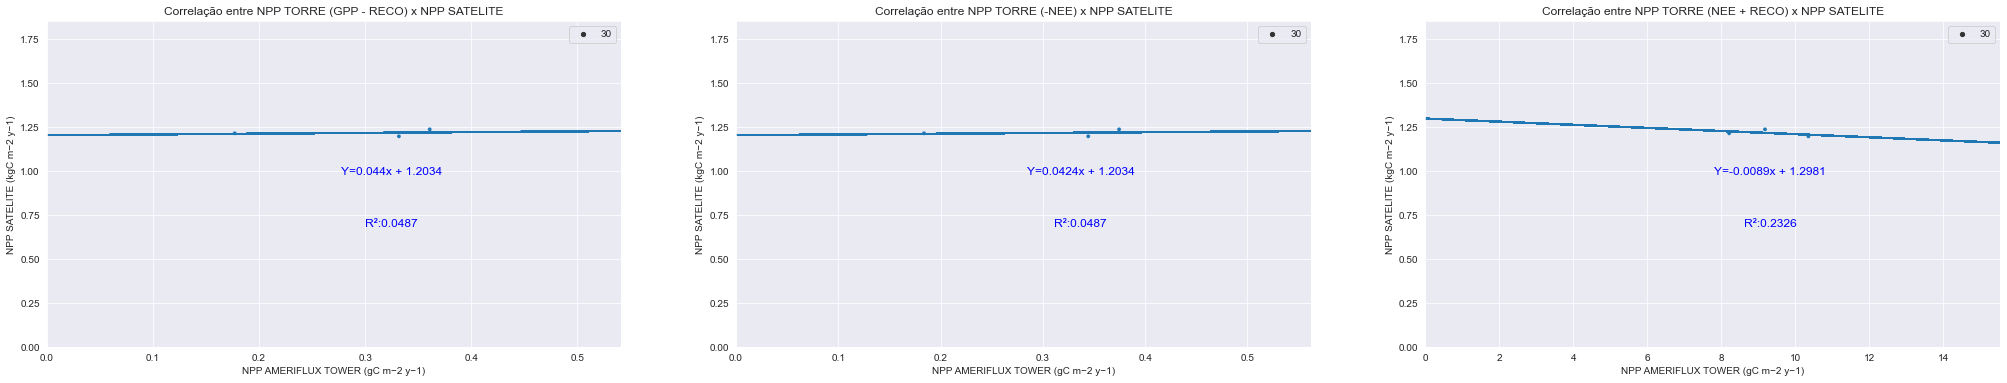

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(35, 6))

eixo_x = 'NPP GPP - RECO'
eixo_x2 = 'NPP (-NEE)'
eixo_x3 = 'NPP NEE + RECO'

eixo_y = 'Modis Tower Pixel'
data = npp_dataframe
xlabel = "NPP AMERIFLUX TOWER (gC m−2 y−1)"
ylabel = "NPP SATELITE (kgC m−2 y−1)"

title = "Correlação entre NPP TORRE (GPP - RECO) x NPP SATELITE"
title2 = "Correlação entre NPP TORRE (-NEE) x NPP SATELITE"
title3 = "Correlação entre NPP TORRE (NEE + RECO) x NPP SATELITE"

reg_graph_subplot(eixo_x,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1,axes=ax, subplot_num=1)
reg_graph_subplot(eixo_x2,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title2,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1,axes=ax, subplot_num=2)
reg_graph_subplot(eixo_x3,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title3,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1,axes=ax, subplot_num=3)

plt.show()

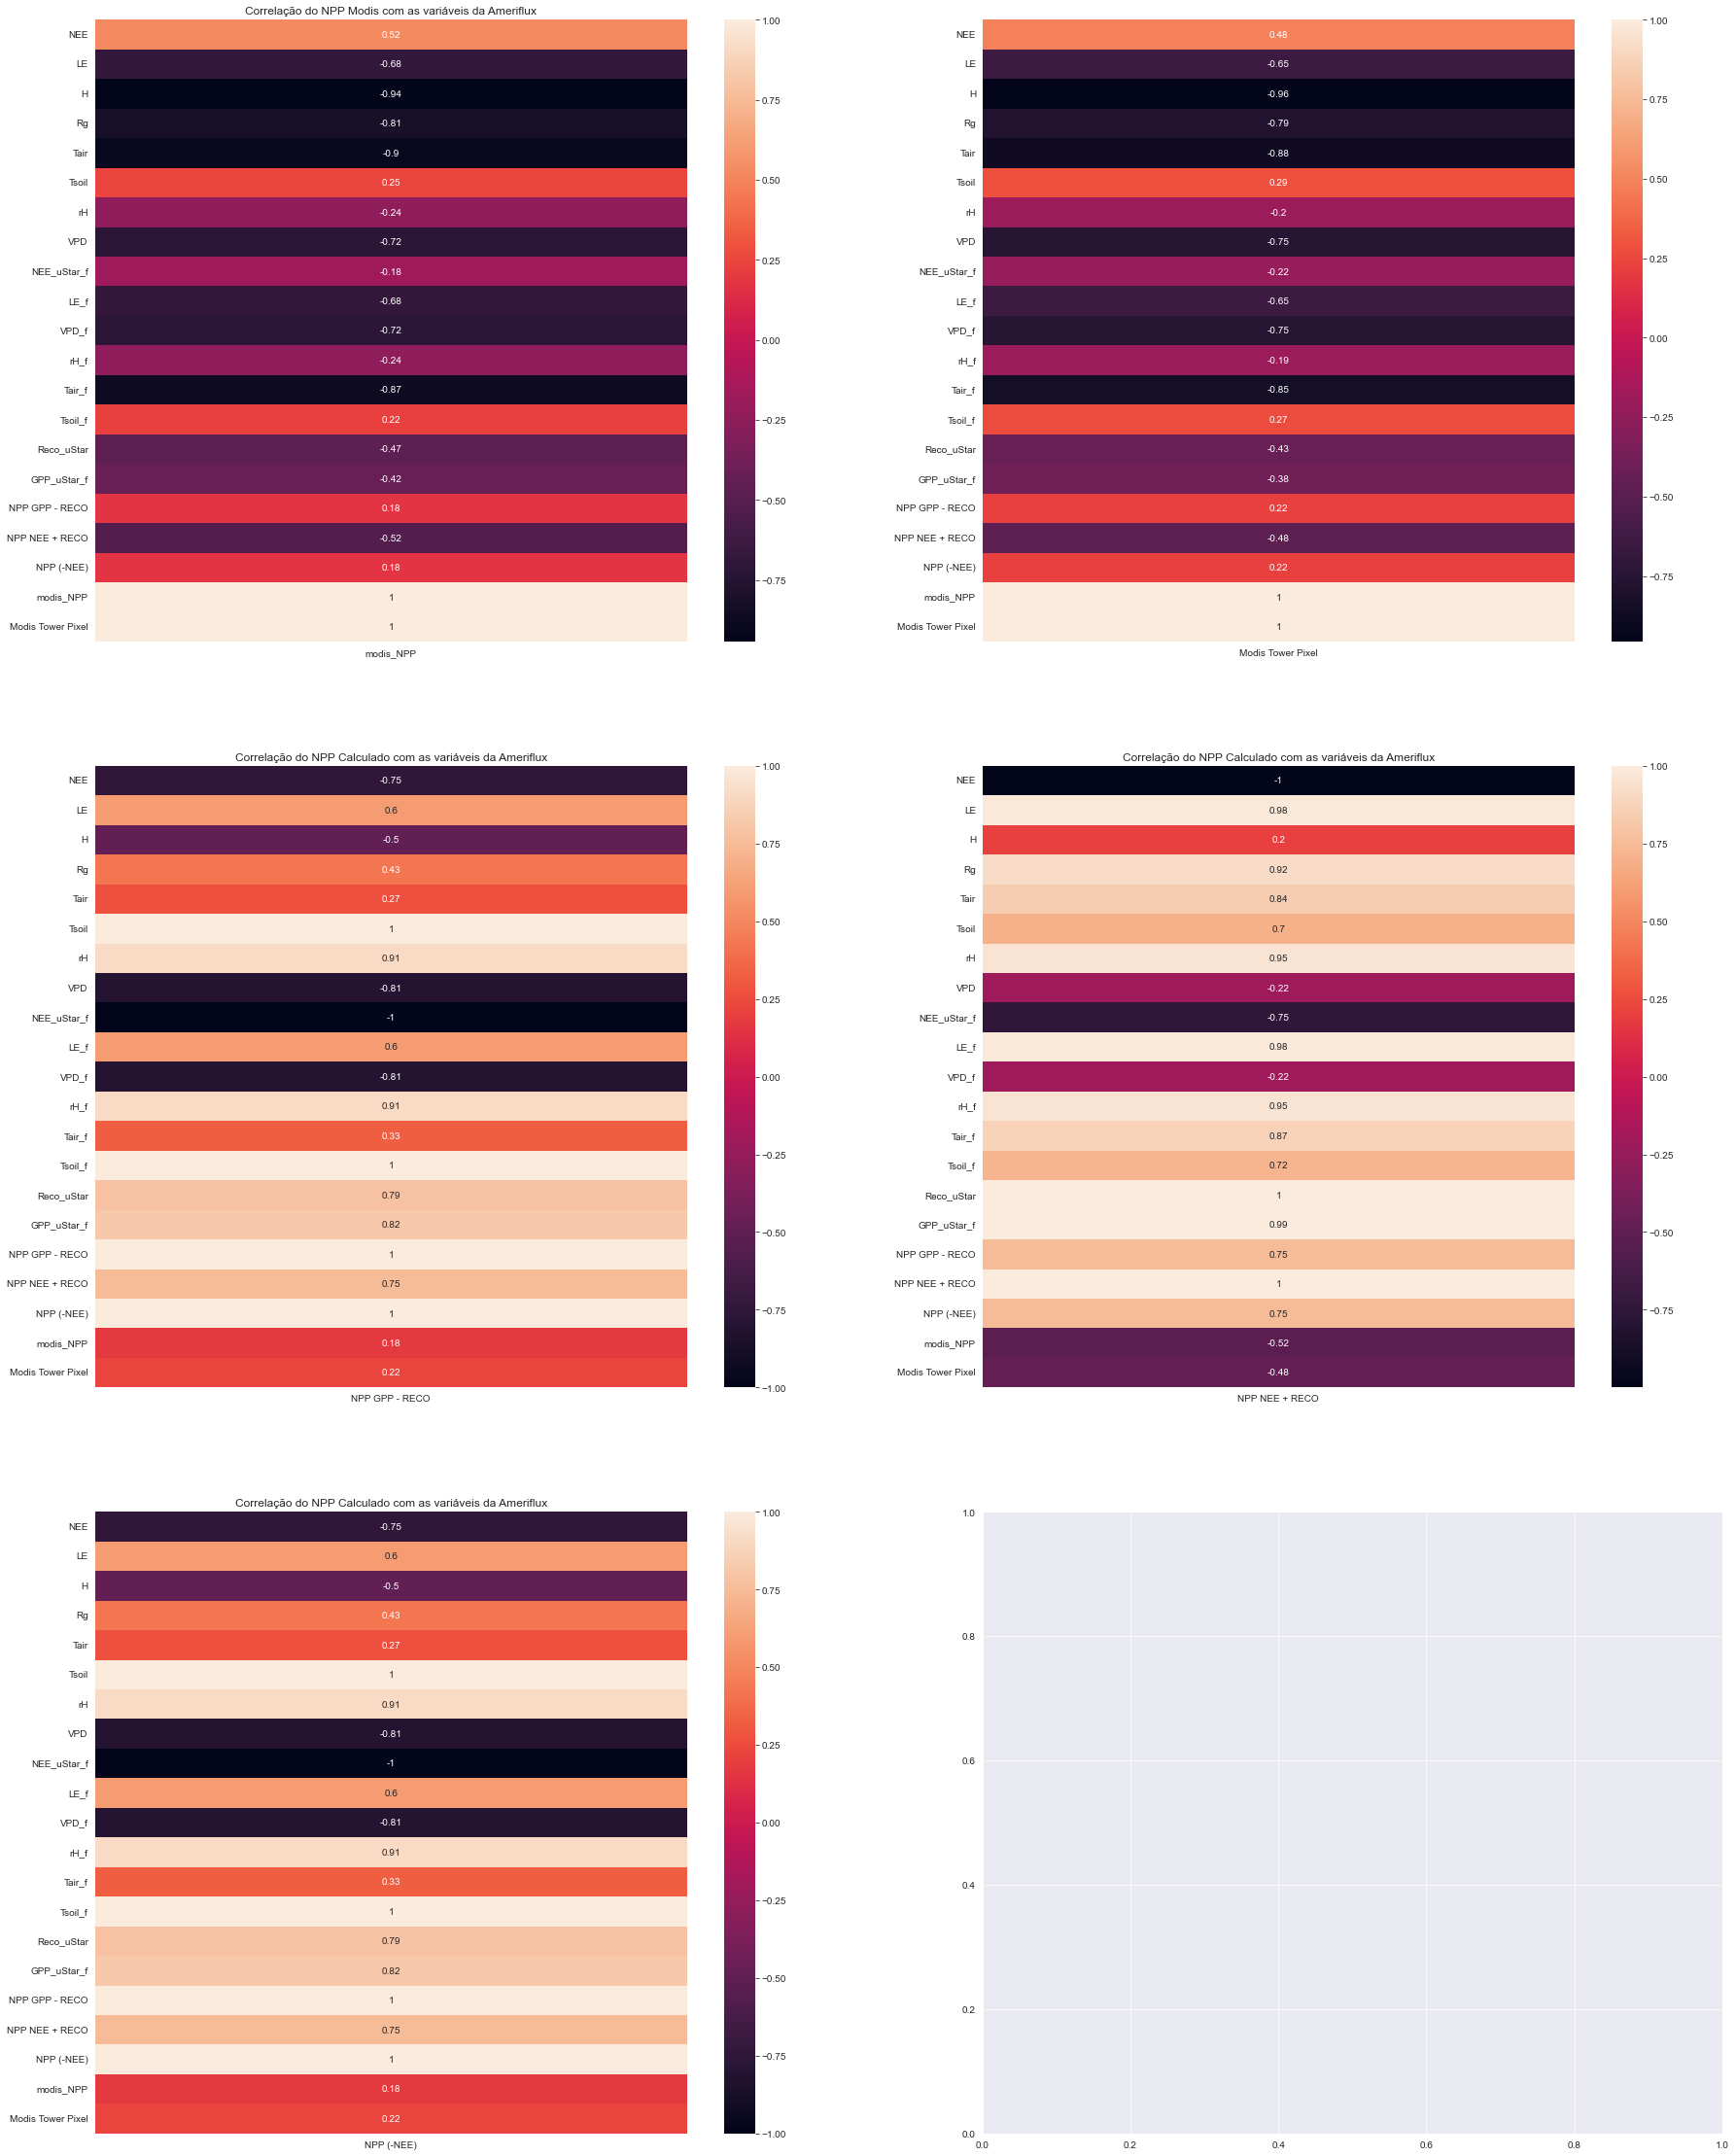

In [70]:
import seaborn as sns

subset_ameriflux = ameriflux[['NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil', 'rH', 'VPD', 'NEE_uStar_f', 'LE_f', 'VPD_f', 'rH_f' ,'Tair_f','Tsoil_f','Reco_uStar','GPP_uStar_f','NPP GPP - RECO','NPP NEE + RECO', "NPP (-NEE)"]].reset_index(drop=True).copy()

modis_NPP = npp_dataframe['modis_NPP'].reset_index(drop=True).copy()
modis_NPP_torre = npp_dataframe['Modis Tower Pixel'].reset_index(drop=True).copy()

fig, axs = plt.subplots(3, 2, figsize=(30, 40))

# Concatene os DataFrames usando pd.concat
concatenated_df = pd.concat([subset_ameriflux, modis_NPP,modis_NPP_torre], axis=1)


sns.heatmap(concatenated_df.corr()['modis_NPP'].to_frame(),annot=True,ax=axs[0][0])
axs[0][0].set_title('Correlação do NPP Modis com as variáveis da Ameriflux')

sns.heatmap(concatenated_df.corr()['Modis Tower Pixel'].to_frame(), ax=axs[0][1],annot=True)
axs[1][0].set_title('Correlação do NPP do pixel da torre com as variáveis da Ameriflux')

sns.heatmap(concatenated_df.corr()['NPP GPP - RECO'].to_frame(), ax=axs[1][0],annot=True)
axs[1][0].set_title('Correlação do NPP Calculado com as variáveis da Ameriflux')

sns.heatmap(concatenated_df.corr()['NPP NEE + RECO'].to_frame(), ax=axs[1][1],annot=True)
axs[1][1].set_title('Correlação do NPP Calculado com as variáveis da Ameriflux')

sns.heatmap(concatenated_df.corr()['NPP (-NEE)'].to_frame(), ax=axs[2][0],annot=True)
axs[2][0].set_title('Correlação do NPP Calculado com as variáveis da Ameriflux')


plt.show()

In [125]:
# Temperature is one of the main climatic factors driving changes in the NPP,
# with obvious seasonal variation. In high latitudes, vegetation growth is periodic,
# and in humid and semi-humid areas, temperature promotes NPP growth by promoting photosynthesis of vegetation and the release of nutrients in soil.
# When the temperature is too high, it aggravates the transpiration of vegetation and decreases the NPP.


# In summary, from the perspective of a single climate factor, the relationship between NPP changes in forest vegetation and temperature in karst areas of southwest China is mainly positive, 
# the relationship with precipitation is complex and the relationship with VPD is negative.
# However, generally, temperature, precipitation and VPD affect NPP changes together, and the impact on the NPP also has a certain seasonality and lag. 
# In humid and semi-humid areas, temperature is the dominant factor, and precipitation is the dominant factor in arid, semi-arid and engineering water shortage areas. 
# In dry and hot seasons, temperature and precipitation affect the VPD and NPP. 
# In addition, the response of forest vegetation NPP to climate is also affected by topographic factors [74].
# For example, in high-altitude areas, due to the particularity of karst landforms, precipitation increases soil erosion, thus reducing vegetation NPP;
# water and soil loss is not easy in low-altitude areas, and precipitation promotes the increase in NPP.

# Novas anotações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML
sns.set_style('darkgrid')

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
    
def reg_graph_subplot(x, y, data, sct_size=None, s=10, title='', legend_visibility=True, legend_title='', xlabel='', ylabel='', fit_intercept=True, ativar_grafico_yx=False, reg_from_start=False, offset_txt_x=0.15, offset_txt_y=2.25, num_rows=1, num_cols=1, subplot_num=1, axes=None):
    # x = eixo x do gráfico
    # y = eixo y do gráfico
    # data = dataframe origem dos dados que representam x e y
    # sct_size = tamanho do scatter no gráfico BASEADO em uma coluna do dataframe
    # s = tamanho do scatter no gráfico BASEADO em um NUMERO
    # title = título do gráfico
    # legend_visibility = visibilidade da legenda
    # legend_title = título da legenda
    # xlabel = título do eixo x
    # ylabel = titulo do eixo y
    # offset_txt_x = deslocamento do texto da função no eixo x
    # offset_txt_y = deslocamento do texto da função no eixo y
    # num_rows = número de linhas de subplots
    # num_cols = número de colunas de subplots
    # subplot_num = número do subplot atual
    # axes = array de eixos para os subplots

    sns.set_style('darkgrid')

    if axes is None:
        f, ax = plt.subplots(num_rows, num_cols, figsize=(12, 5))
        ax = ax.flatten()
        ax = ax[subplot_num - 1]
    else:
        ax = axes[subplot_num - 1]

    sns.scatterplot(x=data[x], y=data[y], data=data, size=sct_size, s=s, ax=ax)

    rng = np.random.default_rng(1234)  # seed para valores aleatórios
    lr = LinearRegression(fit_intercept=fit_intercept)
    fitted_reg = lr.fit(data[[x]], data[[y]])

    if not fit_intercept:
        fitted_reg.intercept_ = [fitted_reg.intercept_]  # Prevenindo erros

    r2_score = fitted_reg.score(data[[x]], data[[y]])  # R² Score
    x_reg_line = rng.uniform(data[x].min(), data[x].max(), size=100)  # gerando valores entre os valores do scatterplot para criar a reta
    y_reg_line = x_reg_line * fitted_reg.coef_ + fitted_reg.intercept_[0]  # função y=ax + b para representar a reta criada

    if reg_from_start:

        if (data[x].min() < 0) and (abs(data[x].min()) > data[y].max()):  # Para valores data[x] negativos

            x_reg_line = rng.uniform(data[x].min() * 2, 0.0, size=10000)  # gerando valores entre os valores do scatterplot para criar a reta, partindo do 0

        elif (data[y].min() < 0) and (abs(data[y].min()) > data[x].max()):  # Para valores data[y] negativos

            x_reg_line = rng.uniform(data[y].min() * 2, 0.0, size=10000)  # gerando valores entre os valores do scatterplot para criar a reta, partindo do 0

        elif (data[x].max() > data[y].max()):

            x_reg_line = rng.uniform(0.0, data[x].max() * 2, size=10000)

        else:

            x_reg_line = rng.uniform(0.0, data[y].max() * 2, size=10000)

        y_reg_line = x_reg_line * fitted_reg.coef_ + fitted_reg.intercept_[0]  # função y=ax + b para representar a reta criada

    text_coord_x = data[x].max() - data[x].max() * offset_txt_x  # eixo x do texto

    ax.text(text_coord_x, offset_txt_y, f'Y={round(fitted_reg.coef_[0][0], 4)}x + {round(fitted_reg.intercept_[0], 4)}',
            fontsize=12, ha='center', va='center', color='blue')  # Texto da reta Azul
    ax.text(text_coord_x, offset_txt_y - (offset_txt_y * 0.3), f'R²:{round(r2_score, 4)}', fontsize=12, ha='center',
            va='center', color='blue')  # Texto r²

    ax.set_ylim((0, (data[y].max() + (data[y].max() / 2))))  # tamanho limite do plot no eixo y
    ax.set_xlim((0, data[x].max() + data[x].max() / 2))  # tamanho limite do plot no eixo x
    ax.plot(x_reg_line, y_reg_line[0])  # reta de regressão

    if ativar_grafico_yx:
        y_x = rng.uniform(0, 1000, size=1000)  # gerando 1000 valores aleatórios
        ax.plot(y_x, y_x, 'k--')  # reta y=x

    if legend_title:
        ax.legend(title=legend_title, loc='upper left').set_visible(legend_visibility)  # legenda no canto superior esquerdo

    ax.set_title(title)  # Título do gráfico
    ax.set_xlabel(xlabel)  # Título do eixo X
    ax.set_ylabel(ylabel)  # Título do eixo y

    return ax

In [2]:
ameriflux = pd.read_csv('../../TORRE DE SANTAREM/Dataset/ameriflux-santarem-dados-original.csv') # Dados da AMERIFLUX
modis = pd.read_csv('./DadosNPPSatelite/filtered_scaled_Npp_500m.csv',header=None)
modis_gpp = pd.read_csv('./DadosGPPSatelite/filtered_scaled_Gpp_500m.csv',header=None,na_values='F')

ameriflux['Time'].values[0] = '00:00:00'
ameriflux['datetime'] = ameriflux['Date'] + ' ' + ameriflux['Time']

ameriflux.index = pd.to_datetime(ameriflux['datetime'])
ameriflux = ameriflux.drop(['Date','Time','Year','datetime'],axis=1)


def to_kgC(x):
    """Retorna valores convertidos para kg C m² s"""
    umol2mol = 1e-06
    Cmol = 0.012011
    minutesinseconds = 1800
    #days2seconds = 86400
    #kg2g = 1000 # Precisamos em kg, não em g, por isso não multipliquei por 1000
    
    return x * umol2mol * Cmol * minutesinseconds # cálculo dado pelo professor
    
def gpp_npp_creator(dataframe:pd.DataFrame,gpp=False):
    """Cria a variável npp a partir das médias do gpp diário (07:00~19:00) e do Reco diário (20:00~06:00)"""
    npp_df = pd.DataFrame(index=dataframe.resample('D').sum().index) # index = datas do dataframe (DADOS NÃO SÃO PUXADOS)
    
    gpp_df = pd.DataFrame(index=dataframe.resample('D').sum().index) # index = datas do dataframe (DADOS NÃO SÃO PUXADOS)
    
    gpp_df['Gpp'] = pd.Series(dtype='float') # Cria uma coluna vazia de gpp
    
    npp_df['Npp'] = pd.Series(dtype='float') # Cria uma coluna vazia de npp
    
    if gpp:
        for i in range(len(gpp_df.index)): # dia 1,2,3,...
            
            """Faz um looping em cada data para retornar os valores de gpp desejados"""

            date = pd.to_datetime(gpp_df.index[i].date()).strftime("%Y/%m/%d") # Transforma os index em uma data YY/MM/DD

            gpp = dataframe['GPP_uStar_f'][date].between_time('07:00', '19:00').mean() 
            
            gpp_df.loc[date,'Gpp'] = gpp # Colocando no dataframe gpp_df

        gpp_df['Gpp'] = gpp_df['Gpp'].apply(to_kgC) # Aplicando transformação para g

        return gpp_df
    
    else:
        for i in range(len(npp_df.index)):
            """Faz um looping em cada data para retornar os valores de npp desejados"""

            date = pd.to_datetime(npp_df.index[i].date()).strftime("%Y/%m/%d") # Transforma os index em uma data YY/MM/DD

            gpp_diario = dataframe['GPP_uStar_f'][date].between_time('07:00', '19:00').mean() # dia 1,2,3,...
            reco_diario = dataframe['Reco_uStar'][date].between_time('20:00', '06:00').mean()

            npp_diario = gpp_diario - reco_diario # GPP - RECO
            npp_df.loc[date,'Npp'] = npp_diario # Colocando no dataframe npp_df

        npp_df['Npp'] = npp_df['Npp'].apply(to_kgC) # Aplicando transformação para kg

        return npp_df
        
Npp_ameriflux = gpp_npp_creator(ameriflux)
gpp_ameriflux = gpp_npp_creator(ameriflux, gpp=True)

In [3]:
ameriflux['Reco_uStar']['2009-01-01'].between_time('20:00', '06:00') # exemplo do "between_time"

datetime
2009-01-01 00:00:00    7.0153
2009-01-01 00:30:00    7.0153
2009-01-01 01:00:00    7.0227
2009-01-01 01:30:00    7.0227
2009-01-01 02:00:00    7.0084
2009-01-01 02:30:00    7.0084
2009-01-01 03:00:00    7.0227
2009-01-01 03:30:00    7.0227
2009-01-01 04:00:00    6.9941
2009-01-01 04:30:00    6.9941
2009-01-01 05:00:00    6.9586
2009-01-01 05:30:00    6.9586
2009-01-01 06:00:00    6.9941
2009-01-01 20:00:00    8.4298
2009-01-01 20:30:00    8.4298
2009-01-01 21:00:00    8.1958
2009-01-01 21:30:00    8.1958
2009-01-01 22:00:00    8.0111
2009-01-01 22:30:00    8.0111
2009-01-01 23:00:00    7.9197
2009-01-01 23:30:00    7.9197
Name: Reco_uStar, dtype: float64

## Analisando o GPP resultante do cálculo

In [4]:
data_str = modis_gpp.loc[modis_gpp[2].str.contains('A2009|A2010|A2011')]

# Faça uma cópia da seleção
data_str = data_str.copy()

# Aplique a função lambda para remover o prefixo
data_str[2] = data_str[2].apply(lambda x: x[1:])

def datetime(x):
    ano = int(x[:4])
    dia_do_ano = int(x[4:])
    data = pd.to_datetime(f'{ano}-{dia_do_ano}', format='%Y-%j')
    return data

data_str[2] = data_str[2].apply(datetime)
data_str.index = data_str[2]
data_str = data_str.drop([0,1,2,3,4],axis=1)[149]

In [5]:
result = data_str.dropna().resample('8D').sum()
indices_diferentes_de_zero = result.index[result != 0]

gpp_ameriflux_8dias = gpp_ameriflux['Gpp'].resample('8D').sum()
gpp_mesmos_dias = gpp_ameriflux_8dias.loc[gpp_ameriflux_8dias.index.isin(indices_diferentes_de_zero)]

display_side_by_side([gpp_mesmos_dias.to_frame(), data_str.dropna().to_frame()], ['ameriflux', 'Modis'])

,Gpp
datetime,
2009-02-18 00:00:00,0.002587
2009-02-26 00:00:00,0.002683
2009-05-01 00:00:00,0.002534
2009-05-17 00:00:00,0.002851
2009-06-18 00:00:00,0.002408
2009-06-26 00:00:00,0.002214
2009-07-04 00:00:00,0.001962
2009-07-28 00:00:00,0.002050
2009-08-05 00:00:00,0.002396


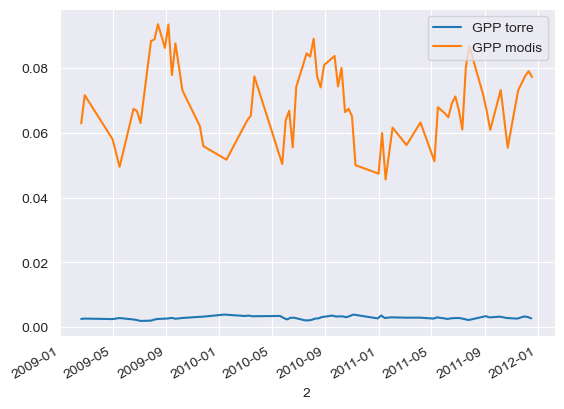

In [6]:
gpp_mesmos_dias.plot()
data_str.dropna().plot()
plt.legend(['GPP torre', 'GPP modis'])

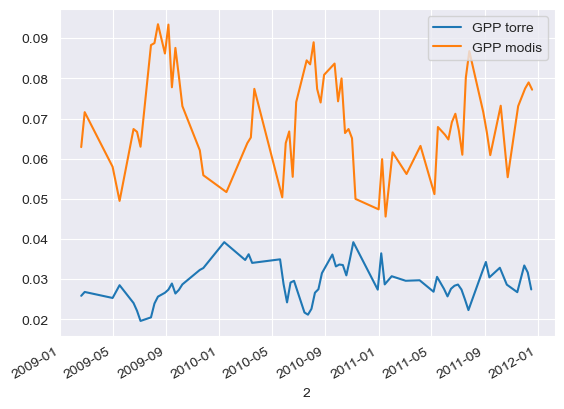

In [7]:
# Ignorar
#(gpp_mesmos_dias * 10).plot()
#data_str.dropna().plot()
#plt.legend(['GPP torre', 'GPP modis'])

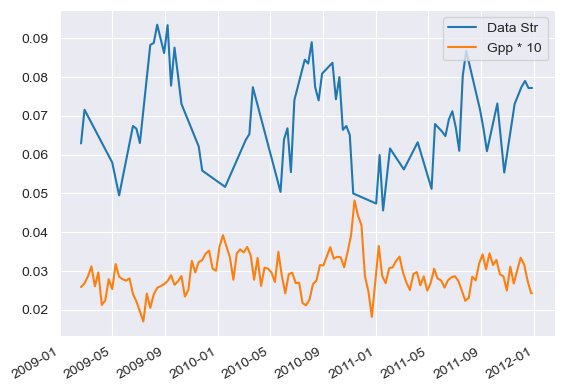

In [10]:
# Ignorar ('interpolação baseada no tempo')
# Estava analisando o comportamento do gráfico
#pd.concat([data_str['2009-02-18':],gpp_ameriflux['Gpp'].resample('8D').sum()['2009-02-18':] * 10],axis=1).interpolate('time').plot().legend(['Data Str', 'Gpp * 10'])

In [11]:
# ignorar
#pd.concat([data_str['2009-02-18':],gpp_ameriflux['Gpp'].resample('8D').sum()['2009-02-18':] * 10],axis=1).interpolate('time').corr()

,149,Gpp
149,1.000000,-0.310833
Gpp,-0.310833,1.000000


<Axes: title={'center': 'Gpp do torre a partir da média'}, xlabel='Modis Tower Pixel', ylabel='Ameriflux GPP'>

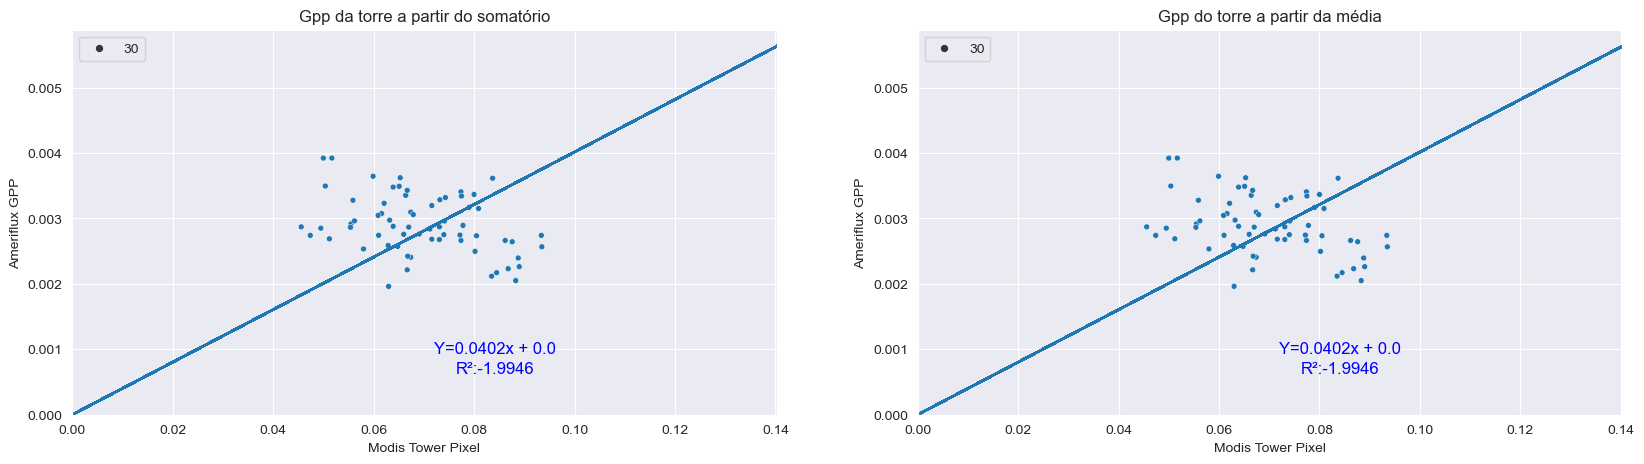

In [60]:
gpp_dataframe = {
    'Ameriflux GPP': gpp_mesmos_dias.values,
    'Modis Tower Pixel': data_str.dropna().values
}
fig, ax = plt.subplots(1,2, figsize=(20, 5))
data = pd.DataFrame(gpp_dataframe)

sns.set_style('darkgrid')

eixo_x = 'Modis Tower Pixel'
eixo_y = 'Ameriflux GPP'

xlabel = 'Modis Tower Pixel'
ylabel = 'Ameriflux GPP'

title = 'Gpp da torre a partir do somatório'

somatorio_corr = data.corr().copy()

reg_graph_subplot(eixo_x,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=0.001,axes=ax,subplot_num=1,fit_intercept=False)


gpp_dataframe = {
    'Ameriflux GPP':gpp_mesmos_dias.values,
    'Modis Tower Pixel': data_str.dropna().values
}
data = pd.DataFrame(gpp_dataframe)

media_corr = data.corr().copy()

title = 'Gpp do torre a partir da média'

reg_graph_subplot(eixo_x,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=0.001,axes=ax,subplot_num=2,fit_intercept=False)

In [61]:
display_side_by_side([somatorio_corr, media_corr], ['ameriflux', 'Modis'])

,Ameriflux GPP,Modis Tower Pixel
Ameriflux GPP,1.000000,-0.356950
Modis Tower Pixel,-0.356950,1.000000
,Ameriflux GPP,Modis Tower Pixel
Ameriflux GPP,1.000000,-0.356950
Modis Tower Pixel,-0.356950,1.000000


## Analisando o NPP resultante do cálculo

In [54]:
def modis_func(modis_data,anos):
    
    modis_data = modis_data.loc[modis_data[2].isin([f'A{anos[0]}001',f'A{anos[1]}001',f'A{anos[2]}001'])].copy().drop([0,1,3,4],axis=1).reset_index().drop('index',axis=1)
        
    modis_data.index = modis_data[2].apply(lambda x:pd.to_datetime(x[1:],format='%Y%j'))    
    
    modis_data = modis_data.drop(2,axis=1)
    
    modis_data = modis_data[[149]]
    
    return modis_data


modis_data_tower = modis_func(modis,[2009,2010,2011])
npp_anos_seguintes = modis_func(modis,[2010,2011,2012])

In [55]:
display_side_by_side([Npp_ameriflux.resample('Y').sum(), modis_data_tower], ['ameriflux', 'Modis'])

,Npp
datetime,
2009-12-31 00:00:00,0.058170
2010-12-31 00:00:00,0.063426
2011-12-31 00:00:00,0.060932
,149
2,
2009-01-01 00:00:00,1.214500
2010-01-01 00:00:00,1.197400
2011-01-01 00:00:00,1.236700


In [56]:
display_side_by_side([Npp_ameriflux.resample('Y').sum(), npp_anos_seguintes], ['ameriflux', 'Modis'])

,Npp
datetime,
2009-12-31 00:00:00,0.058170
2010-12-31 00:00:00,0.063426
2011-12-31 00:00:00,0.060932
,149
2,
2010-01-01 00:00:00,1.197400
2011-01-01 00:00:00,1.236700
2012-01-01 00:00:00,1.103800


<Axes: title={'center': 'Npp do torre a partir da média'}, xlabel='Modis Tower Pixel', ylabel='Ameriflux NPP'>

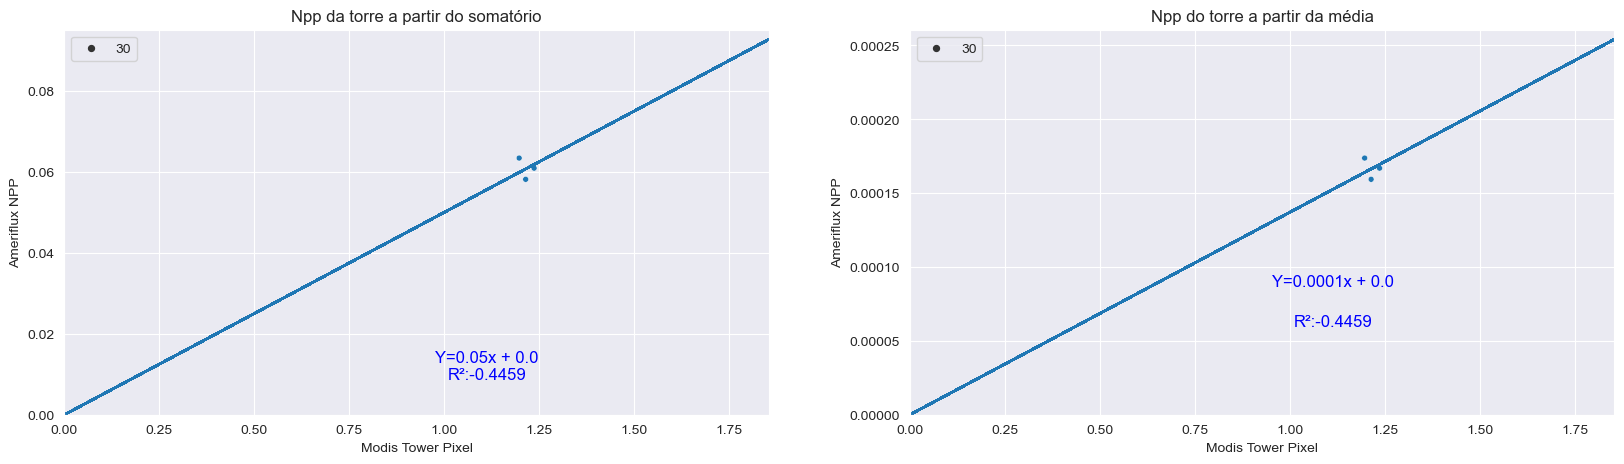

In [62]:
npp_dataframe = {
    'Ameriflux NPP':Npp_ameriflux['Npp'].resample('Y').sum().values,
    'Modis Tower Pixel': modis_data_tower[149].values
}
fig, ax = plt.subplots(1,2, figsize=(20, 5))
data = pd.DataFrame(npp_dataframe)

sns.set_style('darkgrid')

eixo_x = 'Modis Tower Pixel'
eixo_y = 'Ameriflux NPP'

xlabel = 'Modis Tower Pixel'
ylabel = 'Ameriflux NPP'

title = 'Npp da torre a partir do somatório'

somatorio_corr = data.corr().copy()

reg_graph_subplot(eixo_x,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=0.014,axes=ax,subplot_num=1,fit_intercept=False)


npp_dataframe = {
    'Ameriflux NPP':Npp_ameriflux['Npp'].resample('Y').mean().values,
    'Modis Tower Pixel': modis_data_tower[149].values
}
data = pd.DataFrame(npp_dataframe)

title = 'Npp do torre a partir da média'
media_corr = data.corr().copy()

reg_graph_subplot(eixo_x,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=0.00009,axes=ax,subplot_num=2,fit_intercept=False)

In [63]:
display_side_by_side([somatorio_corr, media_corr], ['ameriflux', 'Modis'])

,Ameriflux NPP,Modis Tower Pixel
Ameriflux NPP,1.000000,-0.407288
Modis Tower Pixel,-0.407288,1.000000
,Ameriflux NPP,Modis Tower Pixel
Ameriflux NPP,1.000000,-0.407288
Modis Tower Pixel,-0.407288,1.000000


<Axes: title={'center': 'Npp do torre a partir da média'}, xlabel='Modis Tower Pixel', ylabel='Ameriflux NPP'>

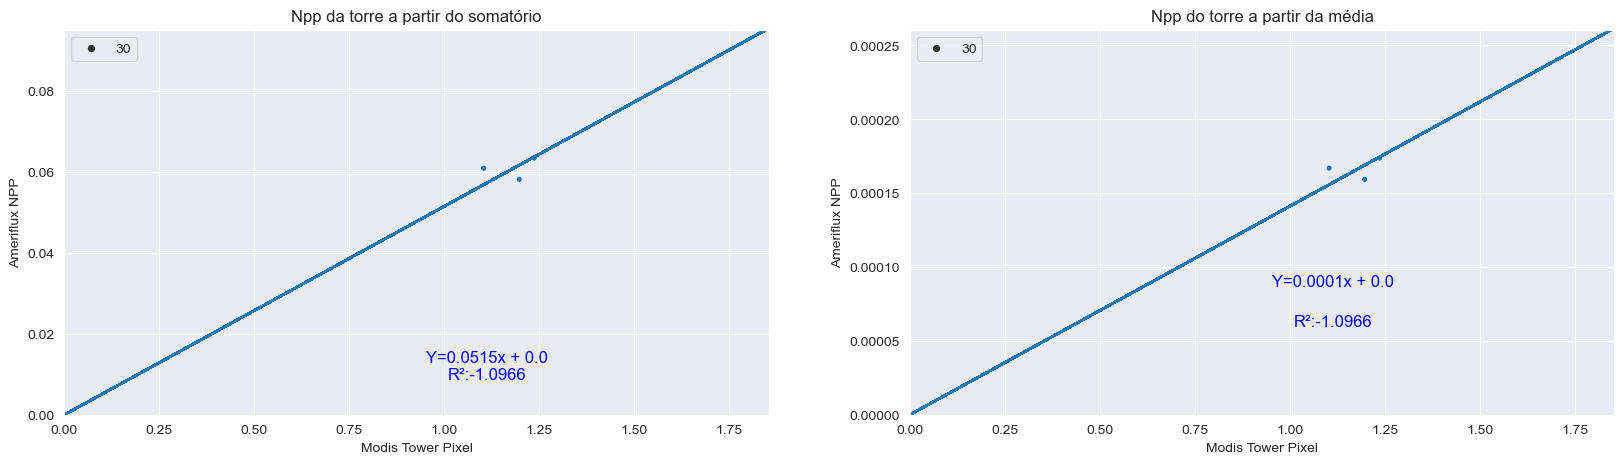

In [64]:
npp_dataframe = {
    'Ameriflux NPP':Npp_ameriflux['Npp'].resample('Y').sum().values,
    'Modis Tower Pixel': npp_anos_seguintes[149].values
}
fig, ax = plt.subplots(1,2, figsize=(20, 5))
data = pd.DataFrame(npp_dataframe)

sns.set_style('darkgrid')

eixo_x = 'Modis Tower Pixel'
eixo_y = 'Ameriflux NPP'

xlabel = 'Modis Tower Pixel'
ylabel = 'Ameriflux NPP'

title = 'Npp da torre a partir do somatório'
somatorio_corr = data.corr().copy()

reg_graph_subplot(eixo_x,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=0.014,axes=ax,subplot_num=1,fit_intercept=False)


npp_dataframe = {
    'Ameriflux NPP':Npp_ameriflux['Npp'].resample('Y').mean().values,
    'Modis Tower Pixel': npp_anos_seguintes[149].values
}
data = pd.DataFrame(npp_dataframe)
media_corr = data.corr().copy()

title = 'Npp do torre a partir da média'

reg_graph_subplot(eixo_x,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=0.00009,axes=ax,subplot_num=2,fit_intercept=False)

In [65]:
display_side_by_side([somatorio_corr, media_corr], ['ameriflux', 'Modis'])

,Ameriflux NPP,Modis Tower Pixel
Ameriflux NPP,1.000000,0.259600
Modis Tower Pixel,0.259600,1.000000
,Ameriflux NPP,Modis Tower Pixel
Ameriflux NPP,1.000000,0.259600
Modis Tower Pixel,0.259600,1.000000
